# 线性回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

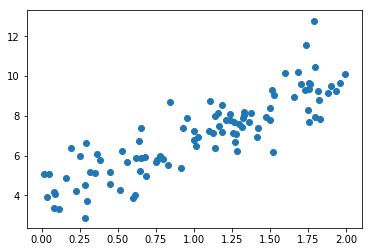

In [3]:
plt.scatter(X,y)
plt.show()

## 正规方程  

$\hat{\theta}=\left(\mathbf{X}^{T} \cdot \mathbf{X}\right)^{-1} \cdot \mathbf{X}^{T} \cdot \mathbf{y}$

In [4]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[3.95524719],
       [2.97052435]])

可以看到参数和我们设置生成数据的参数差别不大

In [5]:
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new]
y_predict = x_new_b @ theta_best
y_predict

array([[3.95524719],
       [9.8962959 ]])

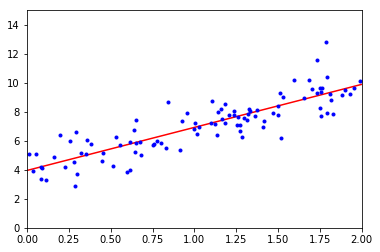

In [6]:
plt.plot(x_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [7]:
#使用sklearn可以达到同样的效果
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.95524719]), array([[2.97052435]]))

In [8]:
lin_reg.predict(x_new)

array([[3.95524719],
       [9.8962959 ]])

## 计算复杂度

正规方程需要计算矩阵 的逆，它是一个 的矩阵（ 是特征的个数） 。这样一个
矩阵求逆的运算复杂度大约在 到 之间，具体值取决于计算方式。换句话说，
如果你将你的特征个数翻倍的话，其计算时间大概会变为原来的 5.3 到 8倍。

# 梯度下降法

## 批量梯度下降

损失函数的偏导数
$\frac{\partial}{\partial \theta_{j}} M S E(\theta)=\frac{2}{m} \sum_{i=1}^{m}\left(\theta^{T} \cdot \mathbf{x}^{(i)}-y^{(i)}\right) x_{j}^{(i)}$$=\frac{2}{m} \mathbf{X}^{T} \cdot(\mathbf{X} \cdot \theta-y)$

In [9]:
eta = 0.1 #学习率
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [10]:
theta 

array([[3.95524719],
       [2.97052435]])

## 随机梯度下降

In [11]:
n_epochs = 50
t0,t1 = 5, 50
#模拟退火，开始学习率大，随着步数增加，慢慢变小
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [12]:
theta

array([[3.93839365],
       [2.97796584]])

In [13]:
#使用sklearn线性回归随机梯度下降
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [14]:
#接近正规方程的解
sgd_reg.intercept_,sgd_reg.coef_

(array([3.89814895]), array([2.90420151]))

## 小批量梯度下降

是批量梯梯度下降和随机梯度下降的一种折中方法，比批量梯度下降计算更快，比随机梯度更靠近最小值

# 多项式回归

$y=0.5 x_{1}^{2}+1.0 x_{1}+2.0$ + 高斯噪声

In [15]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

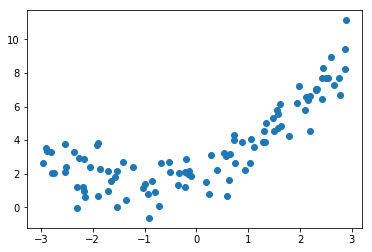

In [16]:
plt.scatter(X,y)
plt.show()

In [17]:
#增加新特征 X^2
from sklearn.preprocessing import PolynomialFeatures
#include_bias未True 就没有前面1那项
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0],X_poly[0]

(array([1.4877692]), array([1.4877692 , 2.21345718]))

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_,lin_reg.coef_

(array([1.99079841]), array([[1.04715767, 0.47760697]]))

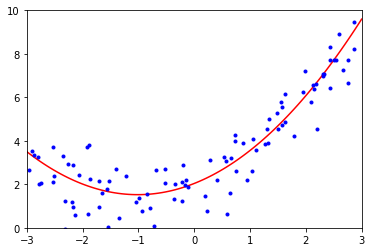

In [19]:
x_p = np.linspace(-3,3,100)
y_p = 0.501 * x_p ** 2 + 1.016 * x_p + 2.039
plt.plot(x_p,y_p,'r-')
plt.plot(X,y,'b.')
plt.axis([-3,3,0,10])
plt.show()

## 学习曲线

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()

In [21]:
lin_reg = LinearRegression()
lin_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

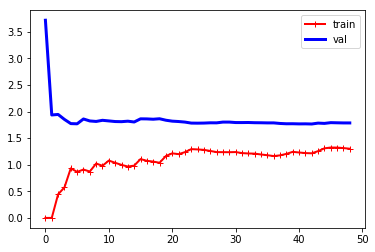

In [60]:
#每次运行结果不同,里面切分数据不固定,固定随机种子random_state结果不一定使我们想要的图
plot_learning_curves(lin_reg,X,y)

上面的曲线表现了一个典型的欠拟合模型，两条曲线都到达高原地带并趋于稳定，并且最后两条曲线非常接近，同时误差值非常大

首先，我们观察训练集的表现：当训练集只有一两个样本的时候，模型能够非常好的拟合它们，这也是为什么曲线是从零开始的原因。但是当加入了一些新的样本的时候，训练集上的拟合程度变得难以接受，出现这种情况有两个原因，一是因为数据中含有噪声，另一个是数据根本不是线性的。因此随着数据规模的增大，误差也会一直增大，直到达到高原地带并趋于稳定，在之后，继续加入新的样本，模型的平均误差不会变得更好或者更差。  

我们继续来看模型在验证集上的表现，当以非常少的样本去训练时，模型不能恰当的泛化，也就是为什么验证误差一开始是非常大的。当训练样本变多的到时候，模型学习的东西变多，验证误差开始缓慢的下降。但是一条直线不可能很好的拟合这些数据，因此最后误差会到达在一个高原地带并趋于稳定，最后和训练集的曲线非常接近

In [23]:
poly_features = PolynomialFeatures(degree=10,include_bias=False)
X_poly_10 = poly_features.fit_transform(X)
X_poly_10[0]

array([ 1.4877692 ,  2.21345718,  3.29311341,  4.89939268,  7.28916551,
       10.84459591, 16.13425574, 24.00404868, 35.71248419, 53.13193388])

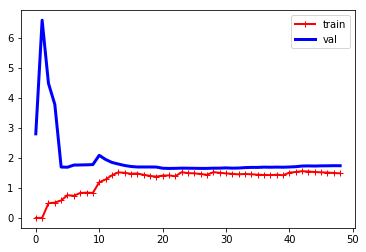

In [67]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)

这幅图像和之前的有一点点像，但是其有两个非常重要的不同点：
- 在训练集上，误差要比线性回归模型低的多。
- 图中的两条曲线之间有间隔，这意味模型在训练集上的表现要比验证集上好的多，这也是模型过拟合的显著特点。当然，如果你使用了更大的训练数据，这两条曲线最后会非接近  

这是典型的过拟合学习曲线  

改善模型过拟合的一种方法是提供更多的训练数据，直到训练误差和验证误差相等，或者简化模型，增加正则化

# 线性模型的正则化

## 岭（Ridge） 回归  

岭回归（也称为 Tikhonov 正则化） 是线性回归的正则化版：在损失函数上直接加上一个正则项

> 注意到这个正则项只有在训练过程中才会被加到损失函数。当得到完成训练的模型后，我们应该使用没有正则化的测量方法去评价模型的表现。

岭回归损失函数: $J(\theta)=M S E(\theta)+\alpha \frac{1}{2} \sum_{i=1}^{n} \theta_{i}^{2}$  

注意的是偏差$\theta_{0}$ 是没有被正则化的（累加运算的开始是i=1 而不是i=0）

### 岭回归的封闭方程的解

$\hat{\theta}=\left(\mathbf{X}^{T} \cdot \mathbf{X}+\alpha \mathbf{A}\right)^{-1} \cdot \mathbf{X}^{T} \cdot \mathbf{y}$

In [25]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.09771594]])

### 随机梯度法进行求解

In [26]:
#l2 表明 权重向量范数平方的一半 即简单的岭回归
sgd_reg =SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.08411448])

## Lasso 回归

Lasso 回归（也称 Least Absolute Shrinkage，或者 Selection Operator Regression） 是另一种正则化版的线性回归：就像岭回归那样，它也在损失函数上添加了一个正则化项，但是它使用权重向量的 l1 范数而不是权重向量 l2 范数平方的一半

Lasso 回归的损失函数： $J(\theta)=M S E(\theta)+\alpha \sum_{i=1}^{n}\left|\theta_{i}\right|$  

Lasso 回归的一个重要特征是它倾向于完全消除最不重要的特征的权重（即将它们设置为零） 

In [27]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.05790498])

In [28]:
#SGDRegressor的l1 可以完成同样的功能
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([5.0965722])

## 弹性网络（ElasticNet）

弹性网络介于 Ridge 回归和 Lasso 回归之间。它的正则项是 Ridge 回归和 Lasso 回归正则项的简单混合，同时你可以控制它们的混合率r，当r=0 时，弹性网络就是 Ridge 回归，当r=1时，其就是 Lasso 回归

弹性网络损失函数：$J(\theta)=M S E(\theta)+r \alpha \sum_{i=1}^{n}\left|\theta_{i}\right|+\frac{1-r}{2} \alpha \sum_{i=1}^{n} \theta_{i}^{2}$

In [29]:
from sklearn.linear_model import ElasticNet
#l1_ratio指的就是混合率 r
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.05751826])

当你的特征仅有少数是真正有用的，你应该选择 Lasso 和弹性网络。  
一般来说，弹性网络的表现要比 Lasso 好，因为当特征数量比样本的数量大的时候，或者特征之间有很强的相关性时，Lasso 可能会表现的不规律

## 早期停止法（Early Stopping）

对于迭代学习算法，有一种非常特殊的正则化方法，就像梯度下降在验证错误达到最小值时立即停止训练那样。我们称为早期停止法。

In [55]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
#当 warm_start=True 时，调用 fit() 方法后，训练会从停下来的地方继续，而不是从头重新开始。
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)
scaler = StandardScaler()
X_poly_10_scaled = scaler.fit_transform(X_poly_10)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_poly_10_scaled,y)
    y_val_predict = sgd_reg.predict(X_poly_10_scaled)
    val_error = mean_squared_error(y_val_predict.ravel(),y.ravel())
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergenc

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergenc

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergenc

In [56]:
best_epoch

999

上面的运行到最大迭代也没有收敛，因为sklearn版本不同，有些参数进行了修改。  
SGD修改了一些参数，加入了早期停止参数，下面调用自带的参数进行运行

In [51]:
sgd_reg = SGDRegressor(max_iter=1000,early_stopping=True,penalty=None,learning_rate='constant',eta0=0.0005)
scaler = StandardScaler()
sgd_reg.fit(X_poly_10_scaled,y)

D:\coding\Anaconda\envs\machine_learning\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [53]:
sgd_reg.n_iter_

384